In [2]:
# Import libraries

# First, let’s import all of the modules, functions and objects we are going to use in this tutorial.

# Load libraries
import pandas# libraries to read in the .CSV file
import numpy
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection # sci-kit learning http://scikit-learn.org/stable/
from sklearn.metrics import classification_report # measurement
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [3]:
# dataset3 = dataset3.drop('temperature',1)
# dataset3 = dataset3.drop('rainfall',1)

readdata = pandas.read_csv('output.csv', nrows=2000)
#dataset = pandas.DataFrame(readdata, columns=["id","surname","firstname","middlename","gender_male","gender_female","state","settlement","rural_settlement","urban_settlement","report_date","report_year","age","age_str","date_of_birth","child_group","a","disease","cholera","diarrhoea","measles","viral_haemmorrhaphic_fever","meningitis","ebola","marburg_virus","yellow_fever","rubella_mars","malaria","serotype","NmA","NmC","NmW","alive","dead","report_outcome","unconfirmed","confirmed","null_serotype"])
dataset3 = pandas.DataFrame(readdata, columns=["gender_male","state","urban_settlement","report_year",
                                               "age","cholera","diarrhoea","measles","viral_haemmorrhaphic_fever",
                                               "meningitis","yellow_fever","rubella_mars","malaria","NmA","NmC","NmW",
                                               "confirmed"])#,"population","gdp","gni"])
print(dataset3.shape)

"""
#population
population = {2009:154324933,2010:158503197,2011:162805071,2012:167228767,2013:171765769,2014:176404902,2015:181137448,2016:185960289,2017:190873311,2018:195874740}
print(population[2009])

#GNI
GNI = {2009:2040,2010:2140,2011:2190,2012:2460,2013:2720,2014:2990,2015:2880,2016:2470,2017:2100,2018:1960}
print(GNI[2009])

#GDP
GDP = {2009:291880204327.419, 2010:363359886203.409, 2011:410334579160.752, 2012:459376049763.999, 2013:514966287334.277, 2014:568498937615.656, 2015:494583180777.103, 2016:404649527537.753, 2017:375745486520.656, 2018:397269616080.908}


zero = numpy.zeros(284484)

dataset3['population'] = zero
dataset3['gdp'] = zero
dataset3['gni'] = zero

# 改population,gdp, gni
count = len(dataset3.index)
for i in range(0,count): #遍历每一个数据
    dataset3.iloc[i,17] = population[dataset3.iloc[i,3]] #改变人口
    dataset3.iloc[i,18] = GDP[dataset3.iloc[i,3]] #改变GDP
    dataset3.iloc[i,19] = GNI[dataset3.iloc[i,3]] #改变GNI

print(dataset3.head(20))
"""


(2000, 17)


"\n#population\npopulation = {2009:154324933,2010:158503197,2011:162805071,2012:167228767,2013:171765769,2014:176404902,2015:181137448,2016:185960289,2017:190873311,2018:195874740}\nprint(population[2009])\n\n#GNI\nGNI = {2009:2040,2010:2140,2011:2190,2012:2460,2013:2720,2014:2990,2015:2880,2016:2470,2017:2100,2018:1960}\nprint(GNI[2009])\n\n#GDP\nGDP = {2009:291880204327.419, 2010:363359886203.409, 2011:410334579160.752, 2012:459376049763.999, 2013:514966287334.277, 2014:568498937615.656, 2015:494583180777.103, 2016:404649527537.753, 2017:375745486520.656, 2018:397269616080.908}\n\n\nzero = numpy.zeros(284484)\n\ndataset3['population'] = zero\ndataset3['gdp'] = zero\ndataset3['gni'] = zero\n\n# 改population,gdp, gni\ncount = len(dataset3.index)\nfor i in range(0,count): #遍历每一个数据\n    dataset3.iloc[i,17] = population[dataset3.iloc[i,3]] #改变人口\n    dataset3.iloc[i,18] = GDP[dataset3.iloc[i,3]] #改变GDP\n    dataset3.iloc[i,19] = GNI[dataset3.iloc[i,3]] #改变GNI\n\nprint(dataset3.head(20))\n"

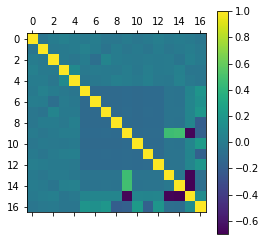

In [4]:
#dataset3.to_csv(r'output.csv')
import matplotlib.pyplot as plt
plt.matshow(dataset3.corr())
colorbar = plt.colorbar()
plt.show()

In [5]:
a = ["gender_male","state","urban_settlement","age","cholera",
     "diarrhoea","measles","viral_haemmorrhaphic_fever","yellow_fever",
     "rubella_mars","malaria","NmA","NmC","NmW","confirmed","meningitis"]#,"population","gdp","gni"]

In [6]:
dataset_train = dataset3[dataset3.report_year != 2018] #挑出2018年的数据
dataset_train.reset_index(inplace=True) #重设index
dataset_train = dataset_train.drop('index',1)
dataset_train = dataset_train.drop('report_year',1)
dataset_train = dataset_train[a]
#print(dataset_train.head(20))

#plt.matshow(dataset_train.corr())
#colorbar = plt.colorbar()
#plt.show()

#print(dataset_train.shape)
from sklearn import preprocessing
interm_x_train = dataset_train.values
scaler = preprocessing.MinMaxScaler()
scaled_x_train = scaler.fit_transform(interm_x_train)
dataset_train= pandas.DataFrame(scaled_x_train)
print(dataset_train.head(20))

     0         1    2         3    4    5    6    7    8    9    10   11   12  \
0   1.0  0.277778  0.0  0.415584  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0  0.750000  1.0  0.311688  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   0.0  0.777778  0.0  0.818182  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
3   1.0  0.833333  1.0  0.116883  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
4   0.0  0.500000  0.0  0.571429  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   0.0  0.944444  0.0  0.792208  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
6   1.0  0.555556  0.0  0.000000  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   1.0  0.555556  0.0  0.701299  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
8   0.0  0.805556  1.0  0.194805  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
9   0.0  0.722222  1.0  0.220779  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  1.0  0.222222  0.0  0.649351  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
11  1.0  0.027778  1.0  0.05

In [7]:
array = dataset_train.values
print(dataset_train.shape)
X_train = array[:,0:15]
y_train = array[:,15]
print(X_train)
print(y_train)

(1802, 16)
[[1.         0.27777778 0.         ... 0.         1.         0.        ]
 [0.         0.75       1.         ... 0.         1.         0.        ]
 [0.         0.77777778 0.         ... 0.         1.         0.        ]
 ...
 [0.         0.30555556 1.         ... 0.         1.         0.        ]
 [1.         0.88888889 0.         ... 0.         1.         1.        ]
 [1.         0.33333333 0.         ... 0.         1.         0.        ]]
[0. 0. 0. ... 0. 0. 0.]


In [8]:
dataset_test = dataset3[dataset3.report_year ==  2018] #挑出2018年的数据
dataset_test.reset_index(inplace=True) #重设index
dataset_test = dataset_test.drop('index',1)

dataset_test = dataset_test[a]
#print(dataset_test.head(20))
#print(dataset_test.shape)

interm_x_test = dataset_test.values
scaled_x_test = scaler.fit_transform(interm_x_test)
dataset_test= pandas.DataFrame(scaled_x_test)
print(dataset_test.head(20))

array = dataset_test.values
X_test= array[:,0:15]
y_test = array[:,15]
print(X_test)

     0         1    2         3    4    5    6    7    8    9    10   11   12  \
0   0.0  0.888889  0.0  0.410256  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1   0.0  0.472222  0.0  0.576923  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2   1.0  0.194444  0.0  0.064103  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
3   0.0  0.027778  1.0  0.923077  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0   
4   1.0  0.555556  1.0  0.846154  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
5   1.0  0.583333  0.0  0.628205  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
6   1.0  0.444444  1.0  0.346154  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
7   1.0  0.527778  1.0  0.153846  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
8   1.0  0.833333  1.0  0.269231  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0   
9   0.0  0.944444  1.0  0.679487  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
10  1.0  0.361111  1.0  0.141026  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
11  0.0  0.888889  0.0  0.33

In [9]:
#from sklearn import decomposition
#pca = decomposition.PCA(n_components=8)
#pca.fit(X_train)
#pca.fit(X_test)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)

print(X_test)
print(X_train)

[[0.         0.88888889 0.         ... 0.         0.         1.        ]
 [0.         0.47222222 0.         ... 0.         1.         0.        ]
 [1.         0.19444444 0.         ... 0.         1.         0.        ]
 ...
 [1.         0.11111111 1.         ... 0.         1.         0.        ]
 [1.         0.72222222 0.         ... 0.         1.         0.        ]
 [1.         0.61111111 0.         ... 0.         1.         0.        ]]
[[1.         0.27777778 0.         ... 0.         1.         0.        ]
 [0.         0.75       1.         ... 0.         1.         0.        ]
 [0.         0.77777778 0.         ... 0.         1.         0.        ]
 ...
 [0.         0.30555556 1.         ... 0.         1.         0.        ]
 [1.         0.88888889 0.         ... 0.         1.         1.        ]
 [1.         0.33333333 0.         ... 0.         1.         0.        ]]


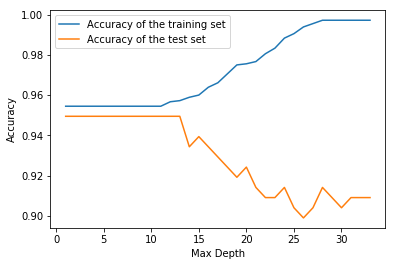

In [10]:
#Decision Tree
import numpy
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.ensemble import RandomForestClassifier    #Random Forest
from sklearn.neural_network import MLPClassifier

training_accuracy = []
test_accuracy = []

max_dep = range(1,34)
neighbors_setting = range(1,34) # can be modified
min_samples_splits = numpy.linspace(0.1, 1.0, 10, endpoint=True)

for md in max_dep:
#for min_samples_split in min_samples_splits:
        tree = DecisionTreeClassifier(max_depth=md)#,random_state=0,max_features=0.9)
        tree.fit(X_train,y_train)
        training_accuracy.append(tree.score(X_train, y_train))
        test_accuracy.append(tree.score(X_test, y_test))
 

plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
#plt.plot(min_samples_splits,training_accuracy, label='Accuracy of the training set')
#plt.plot(min_samples_splits,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

# by looking at plot, best result occurs when max_depth is > 4

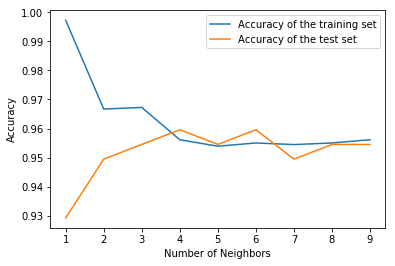

In [11]:
#KNN
training_accuracy = []
test_accuracy = []

#try KNN for diffrent k nearest neighbor from 1 to 15
neighbors_setting = range(1,10) # can be modified

for n_neighbors in neighbors_setting:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))
 
plt.plot(neighbors_setting,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
#by looking at plot, best result accurs when n_neighbors is 1-4


In [12]:
#logistic Regression #Remark: Logistic regression doesn't generate good results
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

print('Accuracy on the training set: {:.3f}'.format(log_reg.score(X_train,y_train)))
print('Accuracy on the test set: {:.3f}'.format(log_reg.score(X_test,y_test)))

#It seems as it does better than KNN

Accuracy on the training set: 0.954
Accuracy on the test set: 0.955


C:\Users\Yifan Wang\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train,y_train)

#you can tune parameter such as:
# - n_job (how many cores)(n_job=-1 => all cores)
# - max_depth
# - max_feature


print('acc for training data: {:.3f}'.format(forest.score(X_train,y_train)))
print('acc for test data: {:.3f}'.format(forest.score(X_test,y_test)))

acc for training data: 0.997
acc for test data: 0.944


In [14]:
from sklearn.neural_network import MLPClassifier
#mlp = MLPClassifier(hidden_layer_sizes=(6,6,6,6,6,6,),max_iter=1000)
mlp = MLPClassifier(solver='sgd', activation='relu',alpha=1e-4,hidden_layer_sizes=(50,50,50), 
                    random_state=20,max_iter=50,verbose=10,learning_rate_init=.01, learning_rate='adaptive')
mlp.fit(X_train, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test, y_test)))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_test).transform(X_test)

mlp = MLPClassifier(max_iter=1000, random_state=42)
mlp.fit(X_train_scaled, y_train)

print('acc for training data: {:.3f}'.format(mlp.score(X_train_scaled, y_train)))
print('acc for test data: {:.3f}'.format(mlp.score(X_test_scaled, y_test)))
print("Training set loss: %f" % mlp.loss_)

Iteration 1, loss = 0.68758405
Iteration 2, loss = 0.34692024
Iteration 3, loss = 0.27144431
Iteration 4, loss = 0.27586190
Iteration 5, loss = 0.26283255
Iteration 6, loss = 0.25092417
Iteration 7, loss = 0.24272330
Iteration 8, loss = 0.23957489
Iteration 9, loss = 0.23132016
Iteration 10, loss = 0.22209329
Iteration 11, loss = 0.21469291
Iteration 12, loss = 0.20653186
Iteration 13, loss = 0.19942677
Iteration 14, loss = 0.19333965
Iteration 15, loss = 0.18830032
Iteration 16, loss = 0.18349661
Iteration 17, loss = 0.17942782
Iteration 18, loss = 0.17520356
Iteration 19, loss = 0.17120970
Iteration 20, loss = 0.18677952
Iteration 21, loss = 0.16713707
Iteration 22, loss = 0.16765263
Iteration 23, loss = 0.17087254
Iteration 24, loss = 0.16102434
Iteration 25, loss = 0.15749721
Iteration 26, loss = 0.16648935
Iteration 27, loss = 0.15404921
Iteration 28, loss = 0.15153931
Iteration 29, loss = 0.14744146
Iteration 30, loss = 0.15919987
Iteration 31, loss = 0.14519326
Iteration 32, los

C:\Users\Yifan Wang\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


acc for training data: 0.954
acc for test data: 0.955
Training set loss: 0.120066


In [15]:
from sklearn.svm import SVC 
svm= SVC()
svm.fit(X_train, y_train)

print('acc on train dataset: {:.3f}'.format(svm.score(X_train,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test,y_test)))


acc on train dataset: 0.954
acc on test dataset: 0.949


C:\Users\Yifan Wang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [16]:
svm = SVC()
svm.fit(X_train_scaled, y_train)
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

acc on train dataset: 0.954
acc on test dataset: 0.955


In [17]:
svm = SVC(C=1000)
print(svm.fit(X_train_scaled, y_train))
print('acc on train dataset: {:.3f}'.format(svm.score(X_train_scaled,y_train)))
print('acc on test dataset: {:.3f}'.format(svm.score(X_test_scaled,y_test)))

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
acc on train dataset: 0.954
acc on test dataset: 0.955


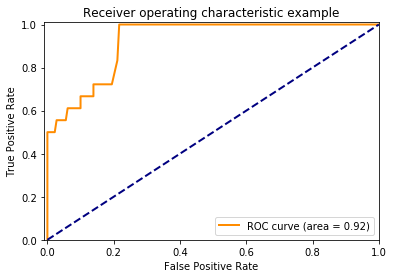

In [30]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y_test = label_binarize(y_test, classes=[0, 1])
n_classes = y_test.shape[1]

classifier = OneVsRestClassifier(tree) #log_reg #svm
#y_score = classifier.fit(X_train, y_train).decision_function(X_test)
#print(y_score.shape)
#print(y_test.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    #fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:])
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], forest.predict_proba(X_test)[:,1]) #forest 和 mlp
    roc_auc[i] = auc(fpr[i], tpr[i])

#print(tpr)

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

C:\Users\Yifan Wang\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(198,)
(198, 1)


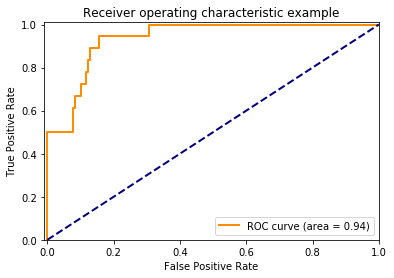

In [32]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
y_test = label_binarize(y_test, classes=[0, 1])
n_classes = y_test.shape[1]

classifier = OneVsRestClassifier(svm) #log_reg #svm
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
print(y_score.shape)
print(y_test.shape)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(1):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:])
    
    roc_auc[i] = auc(fpr[i], tpr[i])

#print(tpr)

plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()